In [ ]:
%load_ext autoreload
%autoreload 2

from graphs import *
from gallagher_algorithm import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# From Params
eta = 0.1
seed = 8
n = 5
np.random.seed(seed)
D = np.random.randint(1, 3, size=(n,n))

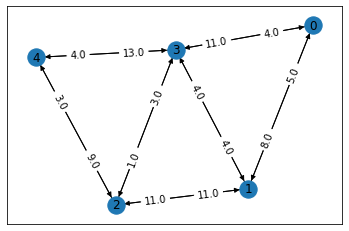

In [10]:
G = netFromPickle('5_node.pkl')

#G = Network(n=n, seed=seed, D=D, p=0.7)
#G.setPhi(initializePhi(G))
#G.toPickle('5_node.pkl')

G.visualize(withEdgeTraffic=True);

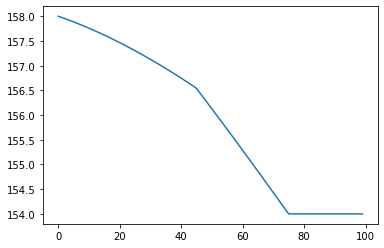

In [11]:
scores = np.zeros(100)
scores[0] = G.D_T()
for i in range(1, len(scores)):
    dR = calculateMarginals(G)
    #dR2 = calculateMarginals_v2(G, dR)
    #print(np.all(dR == dR2))
    tags = calculateBlocked(G, dR, eta)
    if np.any(tags > 0):
        print(tags)
    phi = updateRoutingTable(G, dR, tags, eta)
    G.setPhi(phi)
    scores[i] = G.D_T()
    
plt.plot(scores)